<a href="https://colab.research.google.com/github/04-AhmadThariqRamadhan/PCVK_Genap_2023/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AHMAD THARIQ RAMADHAN / 02 / TI-3B

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [ ]:
img = cv.imread('/content/drive/MyDrive/images/noises/1.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#1. MEDIAN

In [ ]:
def median_filter(data, kernel_size):
    temp = []
    indexer = kernel_size // 2
    data_final = []
    data_final = np.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(kernel_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(kernel_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(kernel_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final

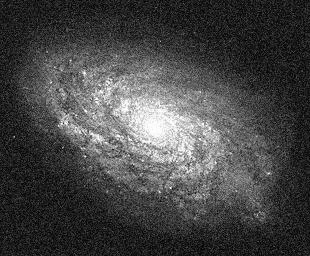

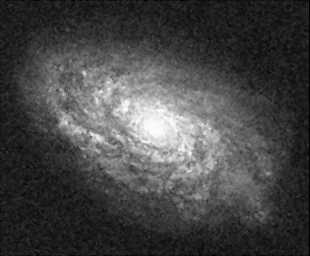

In [ ]:
arr = np.array(img_gray)
removed_noise = median_filter(arr, 3) 
img_filter = im.fromarray(removed_noise)

cv2_imshow(img_gray)
img_filter.show()

#2. MEAN

In [ ]:
def mean_filter(data, kernel_size):
    data_final = np.zeros(data.shape, np.uint8)
    result = 0
    for a in range(1, data.shape[0]-1):
      for b in range(1, data.shape[1]-1):
        for x in range(-1, 2):
          for y in range(-1, 2):
            result = result + data[a+y, b+y]
        data_final[a][b] = int(result / kernel_size)
        result = 0

    return data_final

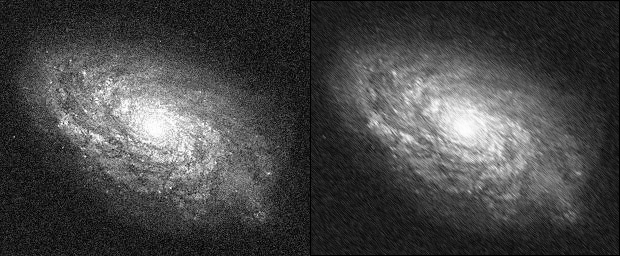

In [ ]:
meanF = mean_filter(img_gray, 9)
final_frame = cv.hconcat((img_gray, meanF))
cv2_imshow(final_frame)

#3. MODUS

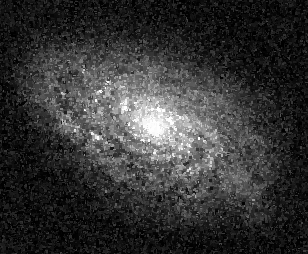

In [ ]:
def modus_filter(data, kernel_size):
    height, width = data.shape
    kernel_height, kernel_width = kernel_size, kernel_size
    output_height = height - kernel_height + 1
    output_width = width - kernel_width + 1

    output_image = np.zeros((output_height, output_width), dtype=data.dtype)

    for y in range(output_height):
        for x in range(output_width):
            kernel = data[y:y+kernel_height, x:x+kernel_width].flatten()
            output_image[y, x] = np.bincount(kernel).argmax()

    output_image = output_image.astype(data.dtype)

    return output_image

kernel_modus = 3
modusF = modus_filter(img_gray, kernel_modus)
cv2_imshow(modusF)

#KONVOLUSI

In [ ]:
def convolution2d(image, kernel, stride, padding):
  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padding_height, padding_width = image.shape

  output_height = (padding_height - kernel_height) // stride + 1
  output_width = (padding_width - kernel_width) // stride + 1

  img_konvo = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      img_konvo[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
  return img_konvo

In [ ]:
img2 = cv.imread('/content/drive/MyDrive/images/couple.tiff')
img_gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
     

#HIGH PASS

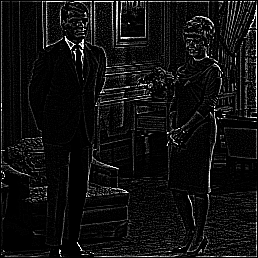

In [ ]:
kernel_high_pass = np.array([[-1, -1, -1],
                            [-1, 8, -1],
                            [-1, -1, -1]])

result_high = convolution2d(img_gray2, kernel_high_pass, 1, 2)
cv2_imshow(result_high)

#LOW PASS

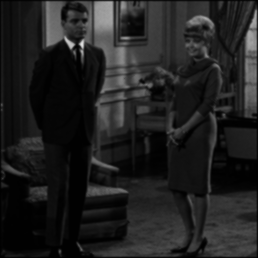

In [ ]:
kernel_low_pass = 1/12 * np.array([[1, 1, 1],
                                  [1, 4, 1],
                                  [1, 1, 1]])

result_low = convolution2d(img_gray2, kernel_low_pass, 1, 2)
cv2_imshow(result_low)